In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

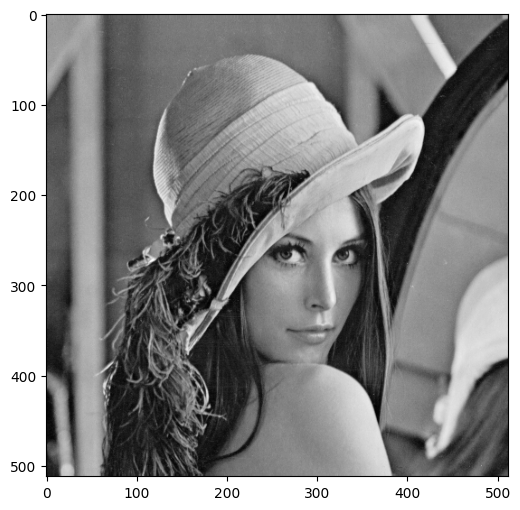

In [3]:
# default figure size
plt.rcParams['figure.figsize'] = (12, 6)

# Select an image by file name
img_path = '/content/drive/MyDrive/DSAI/asgn1/Lenna.png'

# load color image
image = cv2.imread(img_path)

# convert to grayscale using OpenCV
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# plot image
plt.imshow(gray_image, cmap='gray')
plt.show()

## Task 1 - Applying various filters to the input image:

- Gaussian Filter
    - Laplacian Filter
    - Gaussian Blur
- Edge Detection
    - Sobel Filter
    - Canny Edge Detector

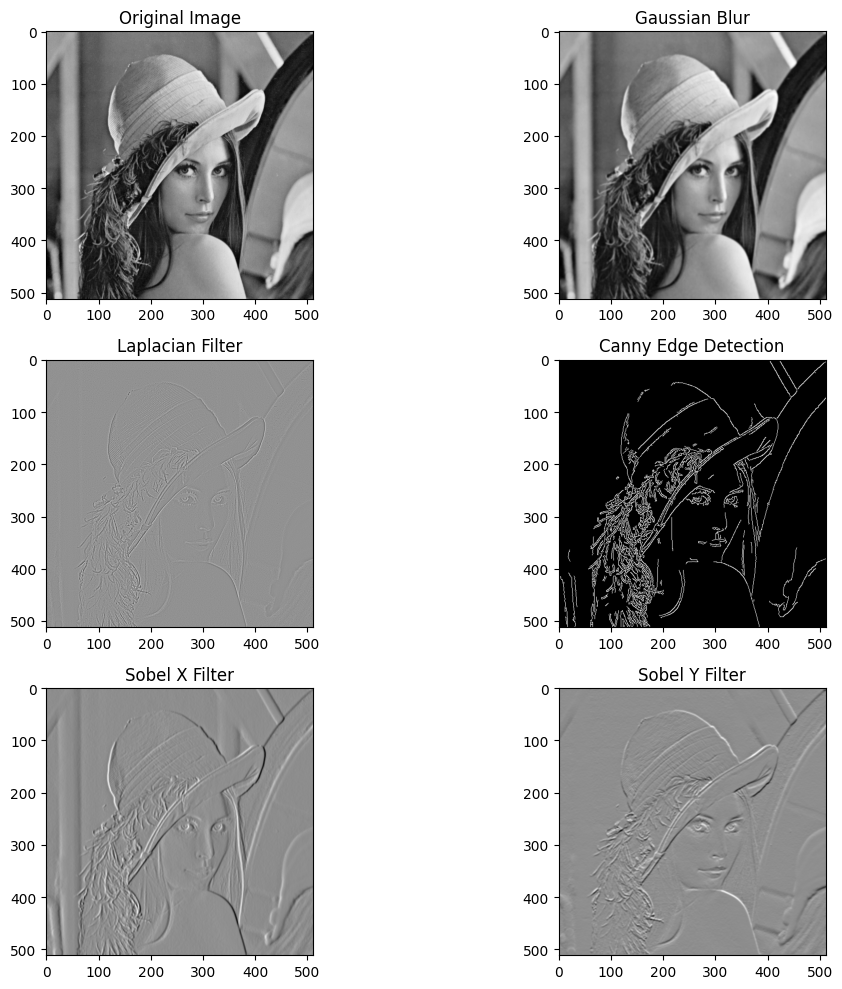

In [4]:
# Apply filters
gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
edges = cv2.Canny(gray_image, 100, 200)
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
# sobel_combined = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

# Plot the images
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 2, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')

plt.subplot(3, 2, 3)
# plt.imshow(np.uint8(np.absolute(laplacian)), cmap='gray')
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Filter')

plt.subplot(3, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.subplot(3, 2, 5)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X Filter')

plt.subplot(3, 2, 6)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y Filter')

plt.tight_layout()
plt.show()

## Task 2:
- Generate random 2D vector of size any one of the above filters and train your filter to learn the chosen functionality using gradient descent algorithm. Plot loss curve.

Epoch [0/200], Loss: 22.507404327392578
Epoch [10/200], Loss: 16.8333797454834
Epoch [20/200], Loss: 12.112409591674805
Epoch [30/200], Loss: 8.372819900512695
Epoch [40/200], Loss: 5.554762840270996
Epoch [50/200], Loss: 3.5350046157836914
Epoch [60/200], Loss: 2.159616470336914
Epoch [70/200], Loss: 1.2716575860977173
Epoch [80/200], Loss: 0.7298296689987183
Epoch [90/200], Loss: 0.4185236394405365
Epoch [100/200], Loss: 0.25084641575813293
Epoch [110/200], Loss: 0.1666042059659958
Epoch [120/200], Loss: 0.12735804915428162
Epoch [130/200], Loss: 0.11051181703805923
Epoch [140/200], Loss: 0.10387707501649857
Epoch [150/200], Loss: 0.10145357996225357
Epoch [160/200], Loss: 0.1005694642663002
Epoch [170/200], Loss: 0.10016491264104843
Epoch [180/200], Loss: 0.09987571835517883
Epoch [190/200], Loss: 0.09959933161735535


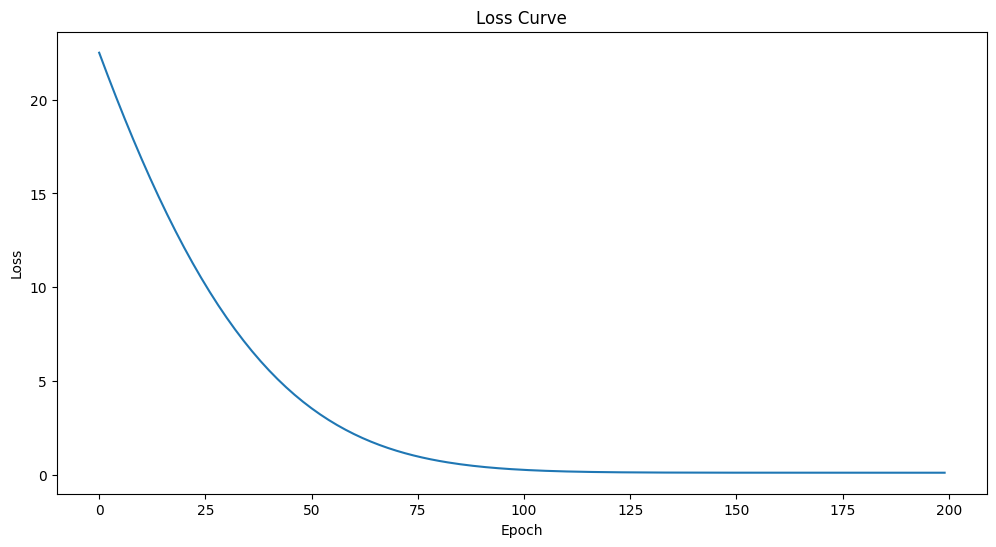

In [13]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Generate a 2D random kernel
kernel_size = 5  # Change the kernel size as desired
random_kernel = torch.randn(1, 1, kernel_size, kernel_size, requires_grad=True)

# Define input image (e.g., random noise image)
input_image = gray_image / 255

# Define desired output (e.g., Gaussian Blur of the input image)
output_image = cv2.GaussianBlur(input_image, (kernel_size, kernel_size), sigmaX=1) / 255
# output_image = cv2.filter2D(input_image, -1, gaussian_filter(kernel_size, 1)) / 255

torch_input_image = torch.tensor(input_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
torch_output_image = torch.tensor(output_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Define loss function (Mean Squared Error)
loss_fn = torch.nn.MSELoss()

# Hyperparameters
learning_rate = 0.005
num_epochs = 200

# Training loop
optimizer = torch.optim.Adam([random_kernel], lr=learning_rate)
losses = []
for epoch in range(num_epochs):
    # Apply kernel to input image using torch.nn.functional.conv2d
    output = F.conv2d(torch_input_image, random_kernel, padding=kernel_size//2)

    # Compute loss
    loss = loss_fn(output, torch_output_image)
    losses.append(loss.item())

    # Backward pass: Compute gradients and update kernel weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}')

# Plot loss curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

## Task 3:
- Applying filters of varying sizes 5x5, 7x7, 9x9, 11x11 on input image.

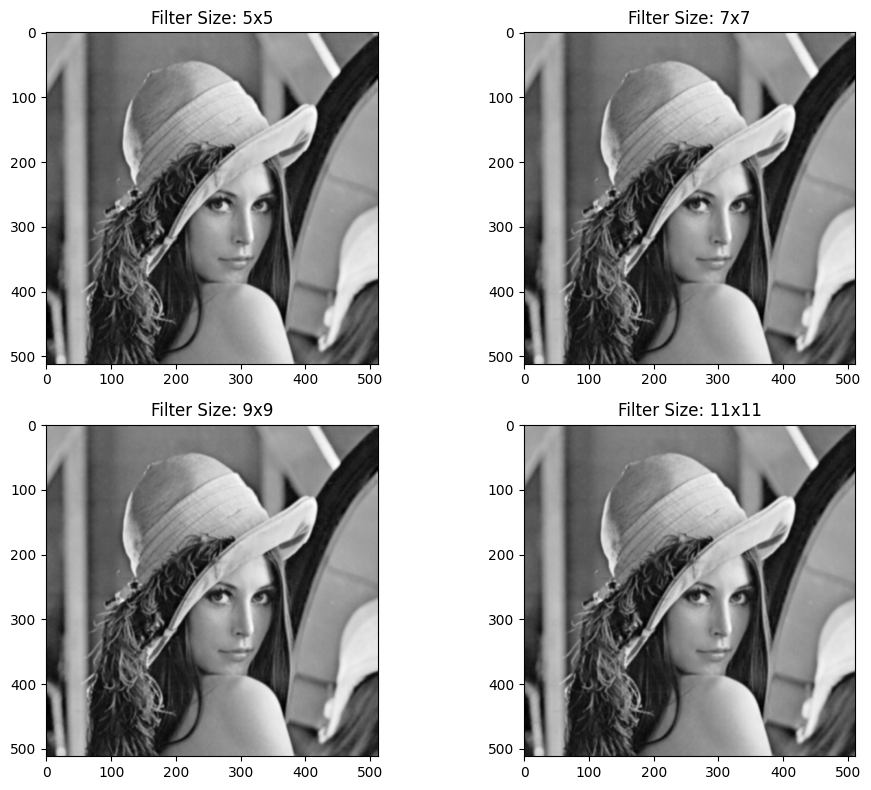

In [6]:
# Define filter sizes
filter_sizes = [5, 7, 9, 11]

# Apply filters of varying sizes
filtered_images = []
for size in filter_sizes:
    # Apply the filter to the image
    filtered_image = cv2.GaussianBlur(input_image, (size, size), sigmaX=1)
    filtered_images.append(filtered_image)

# Plot the images
plt.figure(figsize=(10, 8))

for i in range(len(filter_sizes)):
    plt.subplot(2, 2, i+1)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f'Filter Size: {filter_sizes[i]}x{filter_sizes[i]}')

plt.tight_layout()
plt.show()

## Task 4:
- Use stride on filters, depending on the filter size and padding

In [7]:
def gaussian_filter(kernel_size, sigma):
    """
    Generates a 2D Gaussian filter kernel.

    Args:
    - kernel_size (int): Size of the kernel (should be an odd number).
    - sigma (float): Standard deviation of the Gaussian distribution.

    Returns:
    - kernel (numpy.ndarray): 2D Gaussian filter kernel.
    """
    center = kernel_size // 2
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)
    return kernel

In [8]:
# Apply filters of varying sizes with stride and padding
def gaussian_blur_with_stride_and_padding(input_image, stride=1, padding=1, filter_size=5):

    gaussian_kernel = gaussian_filter(filter_size, 1)

    # Convert kernel to tensor
    torch_kernel = torch.tensor(gaussian_kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(input_image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=0)

    # Apply the filter to the image with stride
    torch_image = torch.tensor(padded_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    blurred = F.conv2d(torch_image, torch_kernel, stride=stride)

    return blurred.squeeze().detach().numpy()

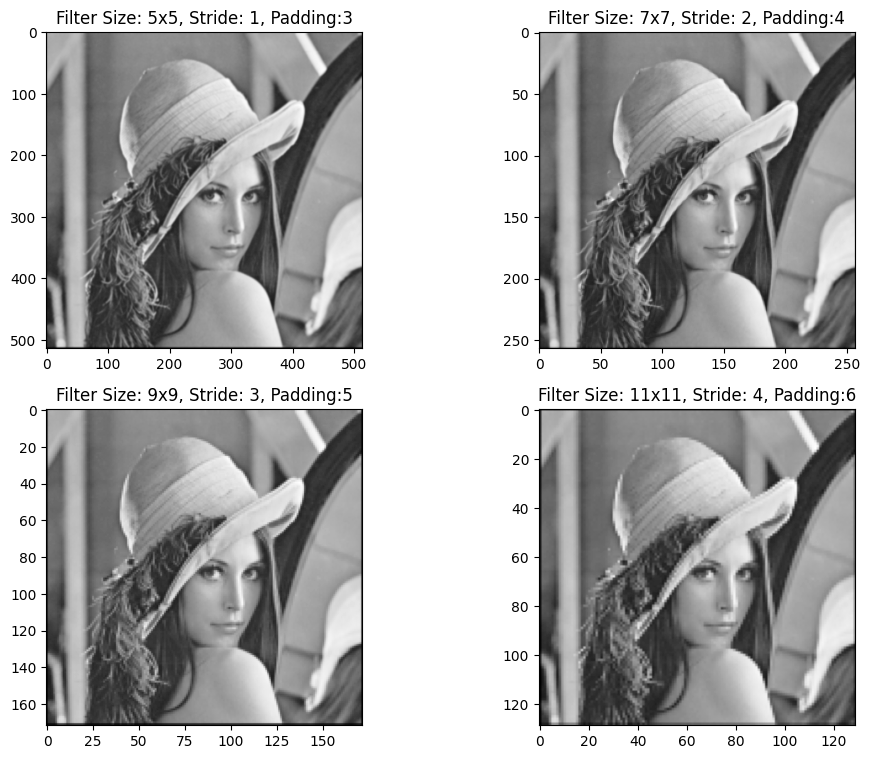

In [9]:
# Define stride and padding
filter_sizes = [5, 7, 9, 11]
strides = [1, 2, 3, 4]
paddings = [3, 4, 5, 6]

filtered_images = []
for i in range(len(filter_sizes)):
    filter_size = filter_sizes[i]
    stride = strides[i]
    padding = paddings[i]

    filtered_image = gaussian_blur_with_stride_and_padding(gray_image, stride, padding, filter_size)

    filtered_images.append(filtered_image)

# Plot the images
plt.figure(figsize=(10, 15))

for i in range(len(filter_sizes)):
    stride = strides[i]
    padding = paddings[i]
    plt.subplot(len(filter_sizes), 2, i+1)
    plt.imshow(filtered_images[i], cmap='gray')
    plt.title(f'Filter Size: {filter_sizes[i]}x{filter_sizes[i]}, Stride: {stride}, Padding:{padding}')

plt.tight_layout()
plt.show()

## Task 5:
- Applying Max pooling, Min pooling, and Average pooling to the applied filter.

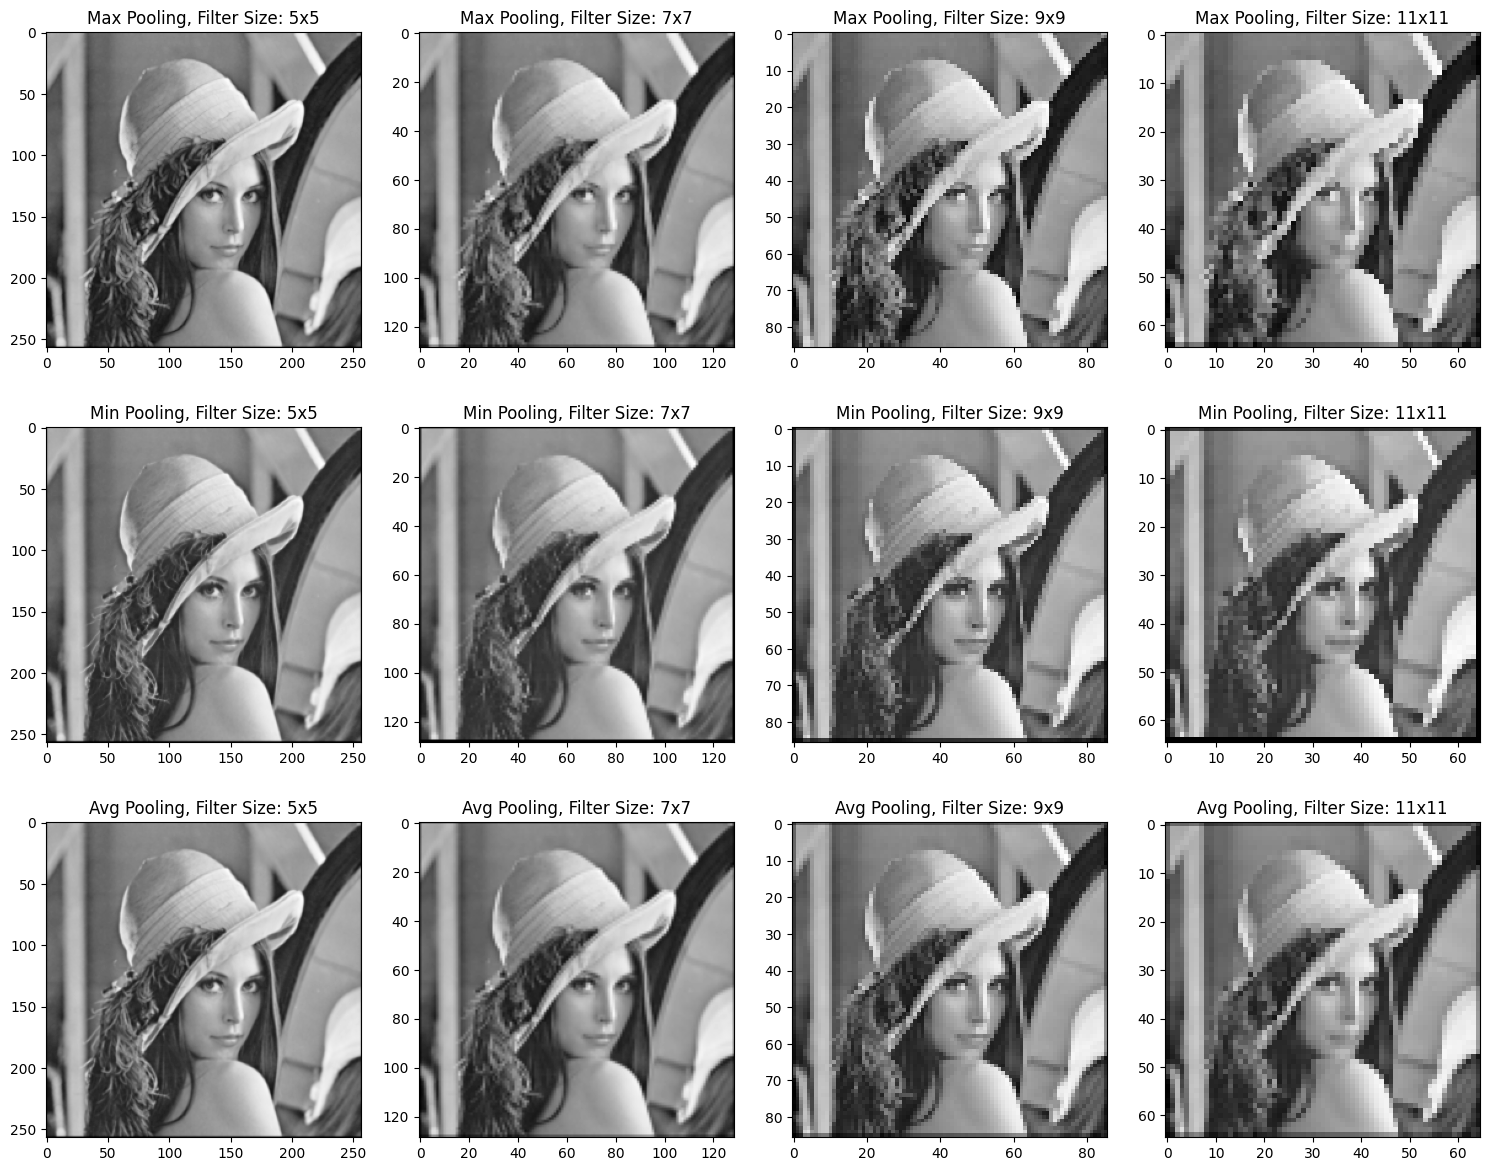

In [10]:
from skimage.measure import block_reduce

# Convert filtered images to float32
pooled_images = [np.expand_dims(np.float32(img), axis=-1) for img in filtered_images]

# Reshape filtered images to add a batch dimension
pooled_images = [np.expand_dims(img, axis=0) for img in pooled_images]

# Apply Max pooling, Min pooling, and Average pooling using TensorFlow
max_pooled_images = [tf.nn.pool(img, window_shape=(2, 2), pooling_type='MAX', strides=(2, 2), padding='SAME') for img in pooled_images]
# min_pooled_images = [tf.nn.pool(img, window_shape=(2, 2), pooling_type='MIN', strides=(2, 2), padding='SAME') for img in pooled_images]
min_pooled_images = [block_reduce(img, block_size=(1, 2, 2, 1), func=np.min) for img in pooled_images]
avg_pooled_images = [tf.nn.pool(img, window_shape=(2, 2), pooling_type='AVG', strides=(2, 2), padding='SAME') for img in pooled_images]

# Plot the pooled images
plt.figure(figsize=(15, 12))

for i in range(len(filter_sizes)):
    plt.subplot(3, len(filter_sizes), i+1)
    plt.imshow(max_pooled_images[i][0, :, :, 0], cmap='gray')  # Remove batch dimension
    plt.title(f'Max Pooling, Filter Size: {filter_sizes[i]}x{filter_sizes[i]}')

    plt.subplot(3, len(filter_sizes), len(filter_sizes)+i+1)
    plt.imshow(min_pooled_images[i][0, :, :, 0], cmap='gray')  # Remove batch dimension
    plt.title(f'Min Pooling, Filter Size: {filter_sizes[i]}x{filter_sizes[i]}')

    plt.subplot(3, len(filter_sizes), 2*len(filter_sizes)+i+1)
    plt.imshow(avg_pooled_images[i][0, :, :, 0], cmap='gray')  # Remove batch dimension
    plt.title(f'Avg Pooling, Filter Size: {filter_sizes[i]}x{filter_sizes[i]}')

plt.tight_layout()
plt.show()

## Task 6
- Visualize the filters of pre trained CNN models(vgg16 or resnet18) and apply them to a new image

In [14]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Extract the weights of the first convolutional layer (block1_conv1)
filters = model.get_layer('block1_conv1').get_weights()[0]

# Normalize the filters
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

print(filters.shape)

58889256/58889256 [==============================] - 0s 0us/step
(3, 3, 3, 64)


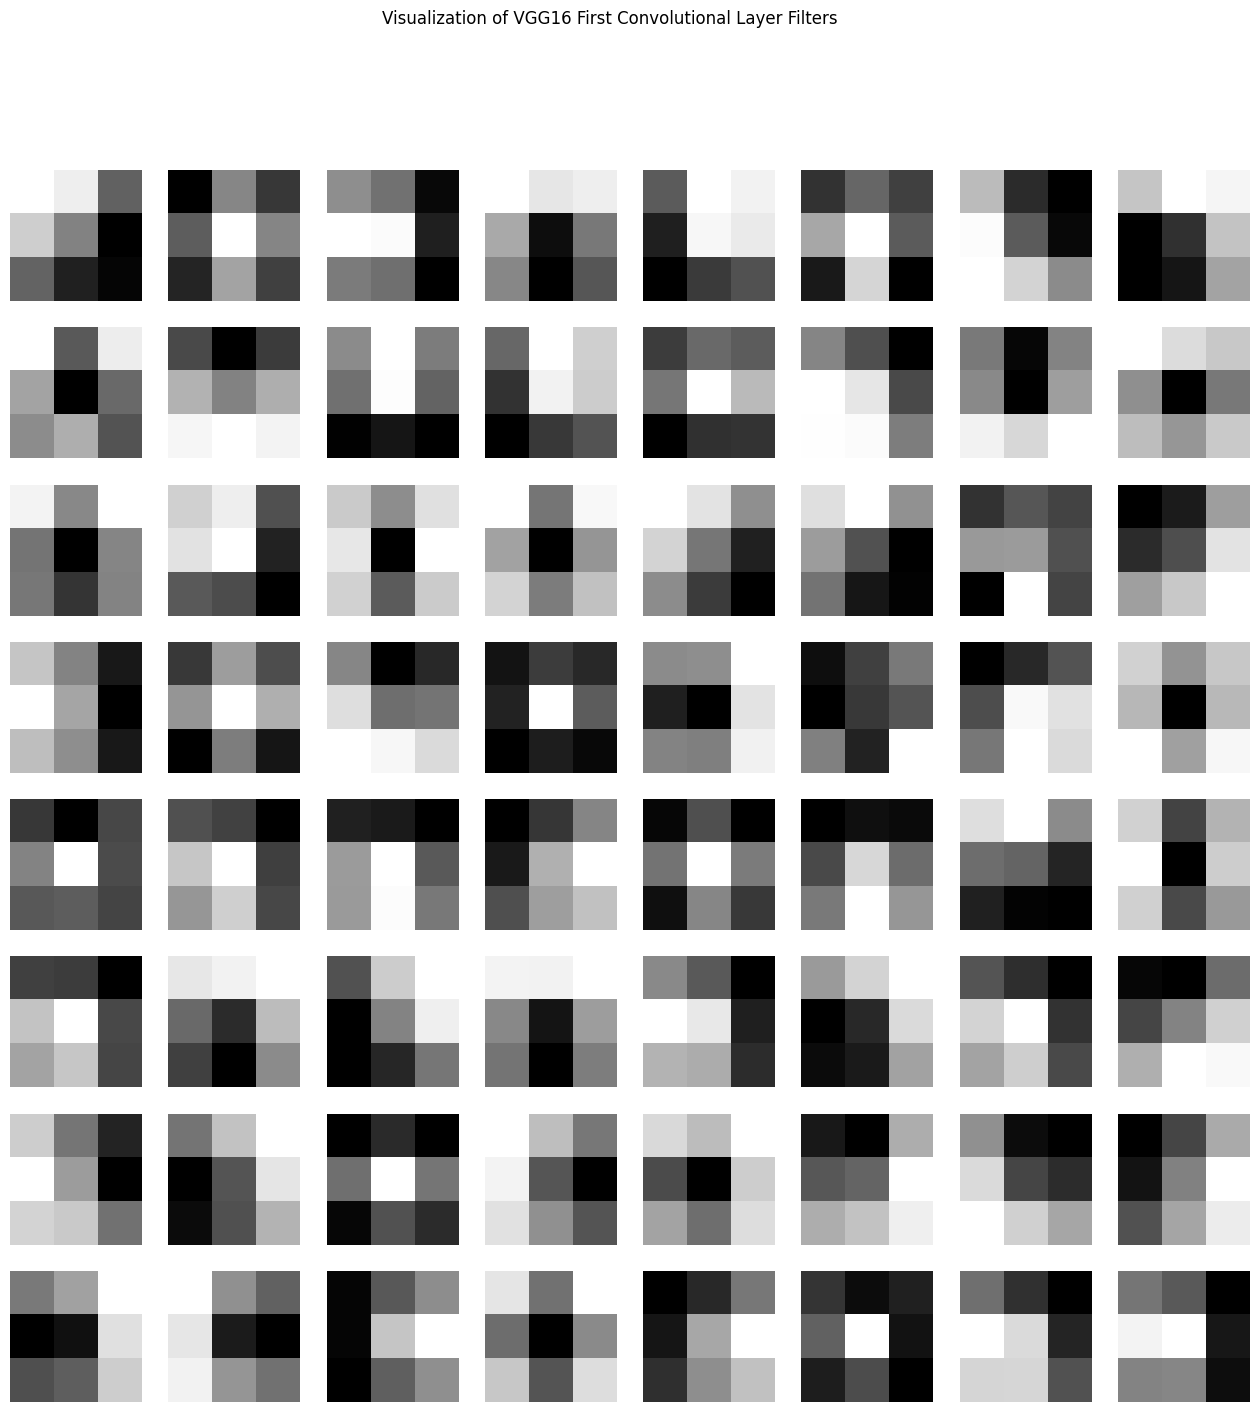

In [15]:
import math

# Visualize the filters
num_filters = filters.shape[-1]
num_cols = 8
num_rows = math.ceil(num_filters/num_cols)

plt.figure(figsize=(num_cols*2, num_rows*2))
for i in range(num_filters):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')

plt.suptitle('Visualization of VGG16 First Convolutional Layer Filters')
plt.show()

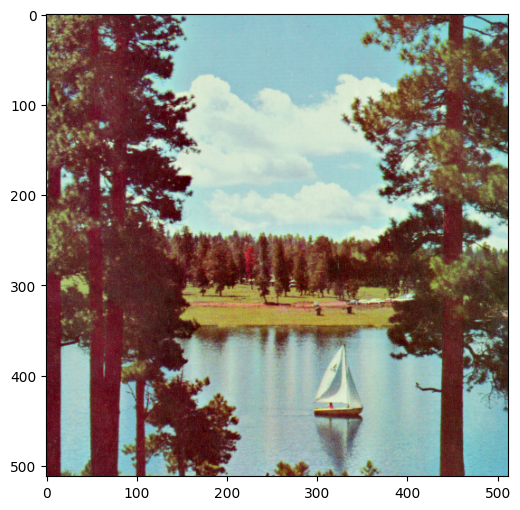

1/1 [==============================] - 0s 202ms/step


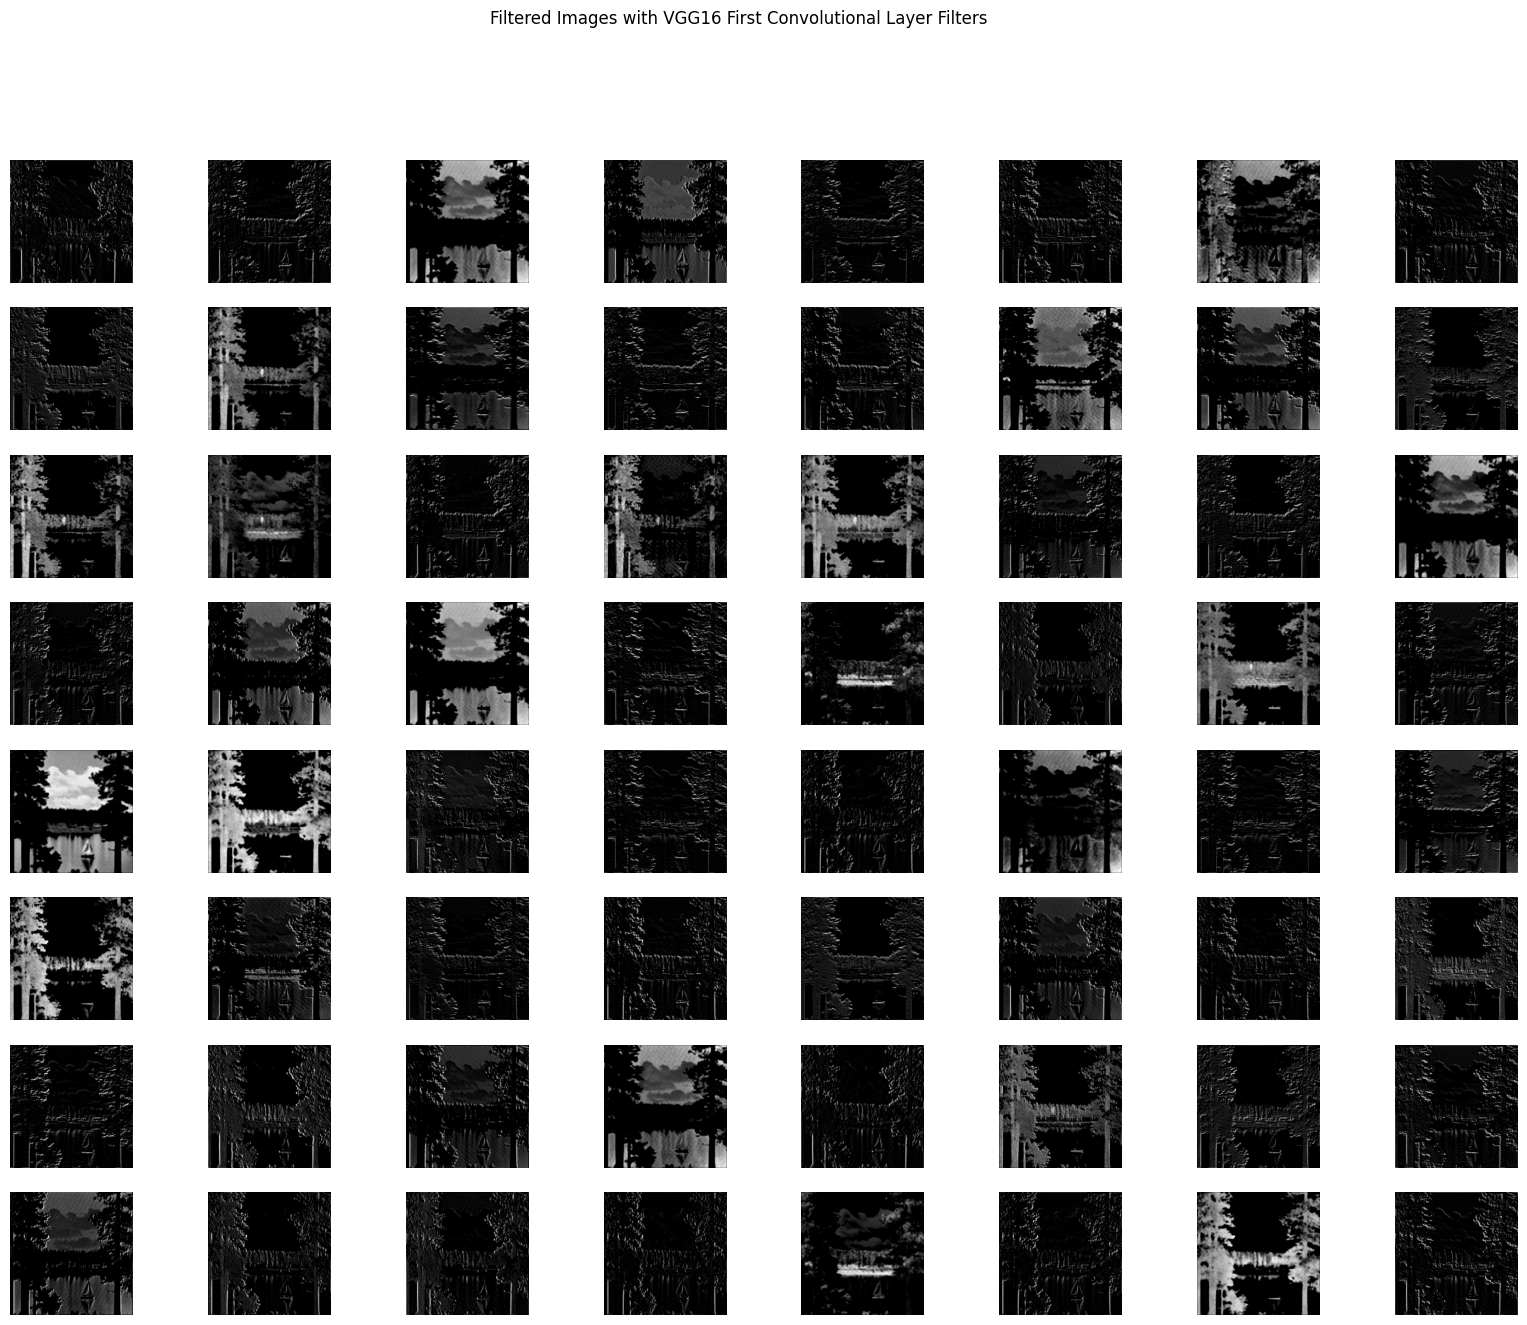

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

num_filters = filters.shape[3]
num_cols = 8
num_rows = math.ceil(num_filters/num_cols)

input_image_path = "/content/drive/MyDrive/DSAI/asgn1/sailboat.bmp"
input_image = load_img(input_image_path, target_size=(224,224))
# convert the image to an array
input_image = img_to_array(input_image)
# expand dimensions so that it represents a single 'sample'
input_image = np.expand_dims(input_image, axis=0)
# print(input_image.shape)
input_image = preprocess_input(input_image)

plt.imshow(cv2.cvtColor(cv2.imread(input_image_path),cv2.COLOR_BGR2RGB))
plt.show()


# Apply the normalized filters to the image
model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

#calculating features_map
features = model.predict(input_image)

fig = plt.figure(figsize=(20,15))
for i in range(num_filters):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    plt.axis('off')

plt.suptitle('Filtered Images with VGG16 First Convolutional Layer Filters')
plt.show()

## Task 7:
- Visualize the filters of a pretrained CNN model( vgg19, resnet) applying on new image. Count the number of learned filters layer wise ( example layers 1, 2,... n). Plot a graph among the number of learned filters and layer numbers. Find the number of duplicate filters after visualizing each filter in each model.

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19,ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import math

# Load pre-trained VGG19 model
model = VGG19(weights='imagenet', include_top=False)
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [5]:
def visualize_filters(model, filters):
    # Extract the weights of the first convolutional layer (block1_conv1)

    # Normalize the filters
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    # Visualize the filters
    num_filters = filters.shape[-1]
    num_cols = 8
    num_rows = math.ceil(num_filters/num_cols)

    plt.figure(figsize=(num_cols*2, num_rows*2))
    for i in range(num_filters):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(filters[:, :, 0, i], cmap='gray')
        plt.axis('off')

    plt.suptitle(f'Visualization of {model.name} First Convolutional Layer Filters')
    plt.show()

In [6]:
def visualize_feature_maps(model, image, model_name):
    features = model.predict(image)

    num_features = features.shape[-1]
    num_cols = 8
    num_rows = math.ceil(num_features/num_cols)
    fig = plt.figure(figsize=(20, 16))
    for i in range(num_features):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(features[0,:,:,i-1] , cmap='gray')
        plt.axis('off')

    plt.suptitle(f'Filtered Images with {model_name} First Convolutional Layer Filters')
    plt.show()

In [7]:
def plot_filters_count(model):
    # Extract the learned filters layer-wise and visualize
    num_filters_per_layer = []
    # duplicate_filters_per_layer = []
    for i, layer in enumerate(model.layers):
        if '_conv' not in layer.name:
            continue
        weights = layer.get_weights()[0]
        num_filters = weights.shape[3]
        num_filters_per_layer.append(num_filters)

    # Plot a graph showing the number of learned filters versus layer numbers
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(num_filters_per_layer) + 1), num_filters_per_layer, label='Number of Learned Filters', marker='o')
    plt.xlabel('Layer Number')
    plt.ylabel('Number of Filters')
    plt.title(f'Number of Learned Filters per Layer for {model.name}')
    plt.legend()
    plt.show()

In [8]:
def count_duplicate_filters(model):
    # Counts the number of duplicate filters in a model.
    duplicate_filters_per_layer = []
    for i, layer in enumerate(model.layers):
        if '_conv' not in layer.name:
            continue
        weights = layer.get_weights()[0]
        num_filters = weights.shape[3]

        # Find duplicate filters
        weights_flat = np.reshape(weights, (num_filters, -1))
        num_unique_filters = len(np.unique(weights_flat, axis=0))
        duplicate_filters = num_filters - num_unique_filters
        duplicate_filters_per_layer.append(duplicate_filters)

    print(f"Number of duplicate filters in {model.name} = {np.sum(duplicate_filters_per_layer)}")

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

def retrain_model_with_image(model, img_array):
    # Path to your single image
    # Assuming the task is still classification among the original ImageNet classes
    # image array is suitably preprocessed

    # labels for demonstration: using one-hot encoding for class 0
    num_classes = 1000  # For ImageNet
    batch_size = img_array.shape[0]
    labels = np.zeros((batch_size, num_classes))
    labels[:, 0] = 1  # Assuming all images belong to class 0

    # Prepare data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Prepare the generator
    augmented_data_generator = datagen.flow(img_array, labels, batch_size=batch_size)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Fine-tune the model
    model.fit(augmented_data_generator, steps_per_epoch=1, epochs=10)

    return model

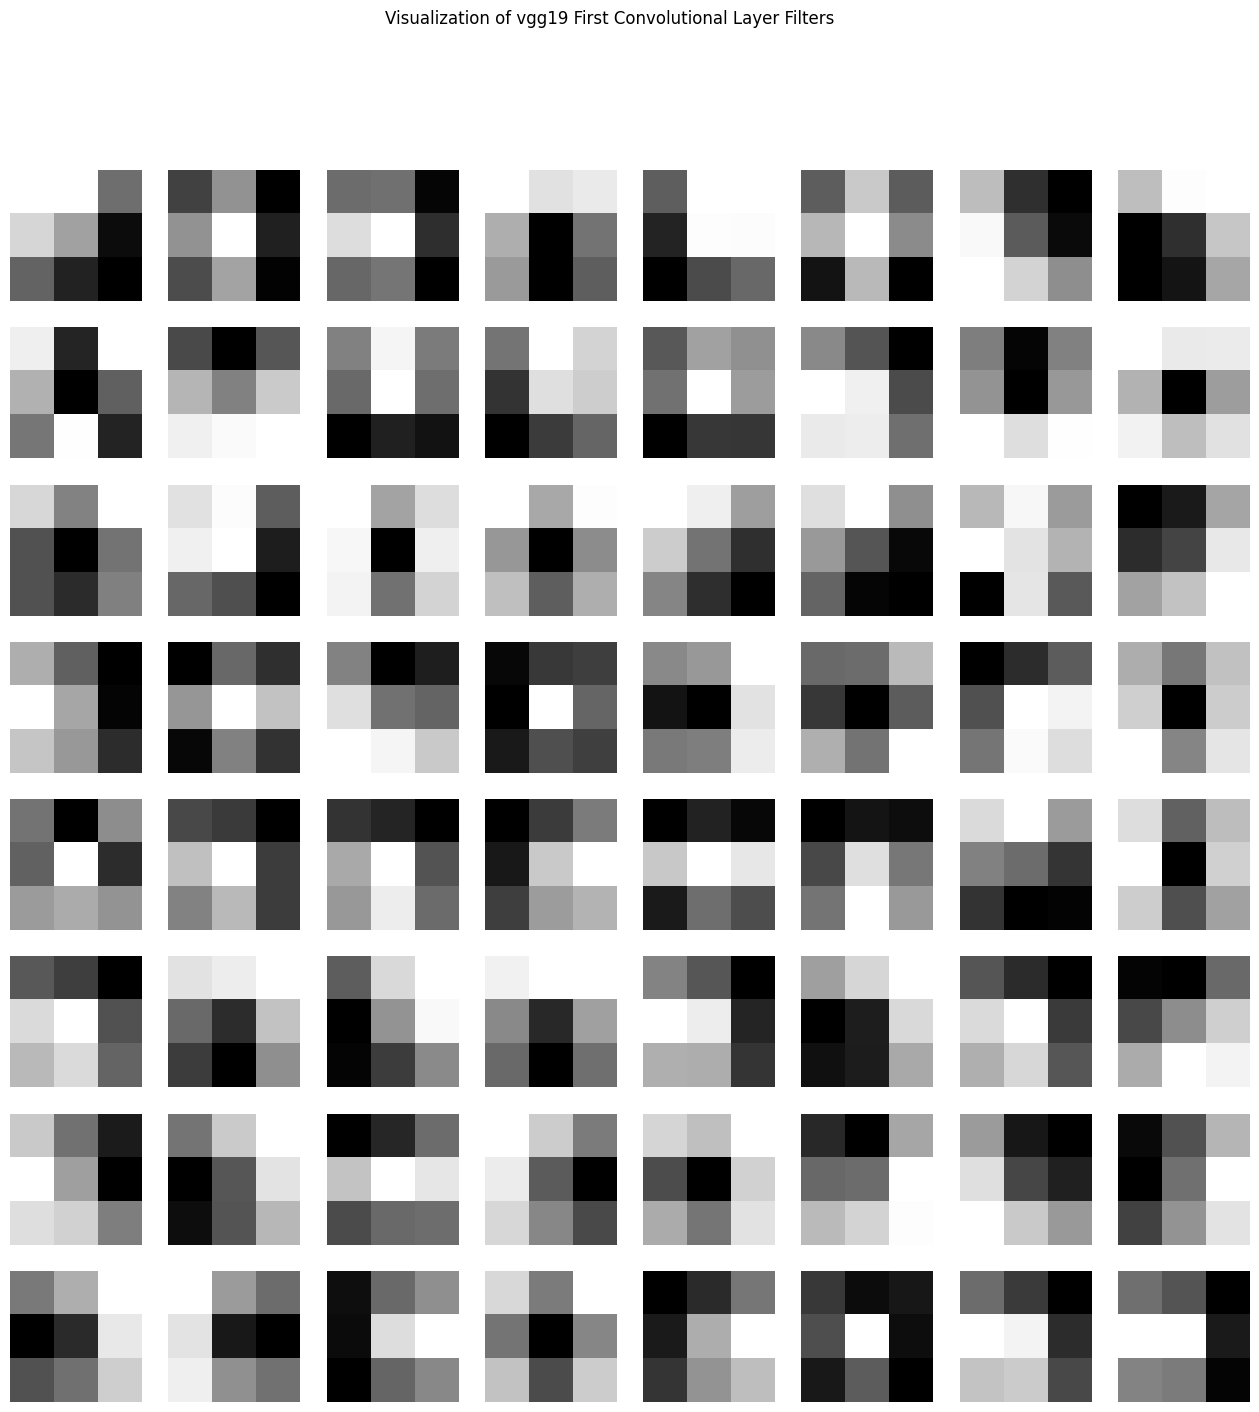

In [10]:
# Load pre-trained VGG19 model
model = VGG19(weights='imagenet', include_top=False)
filters = model.get_layer('block1_conv1').get_weights()[0]
visualize_filters(model, filters)




1/1 [==============================] - 0s 228ms/step


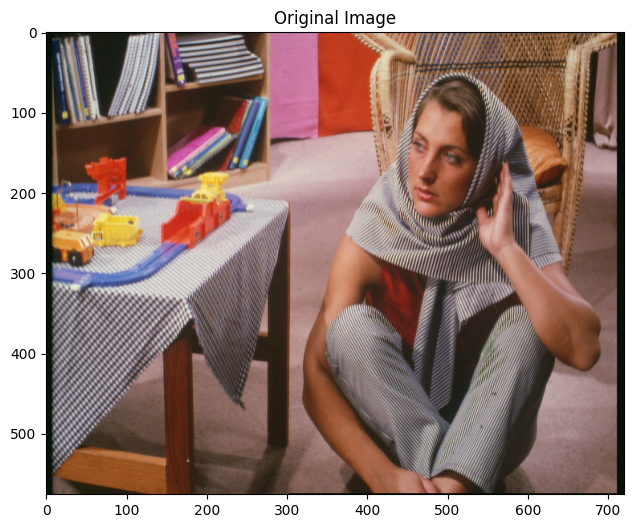

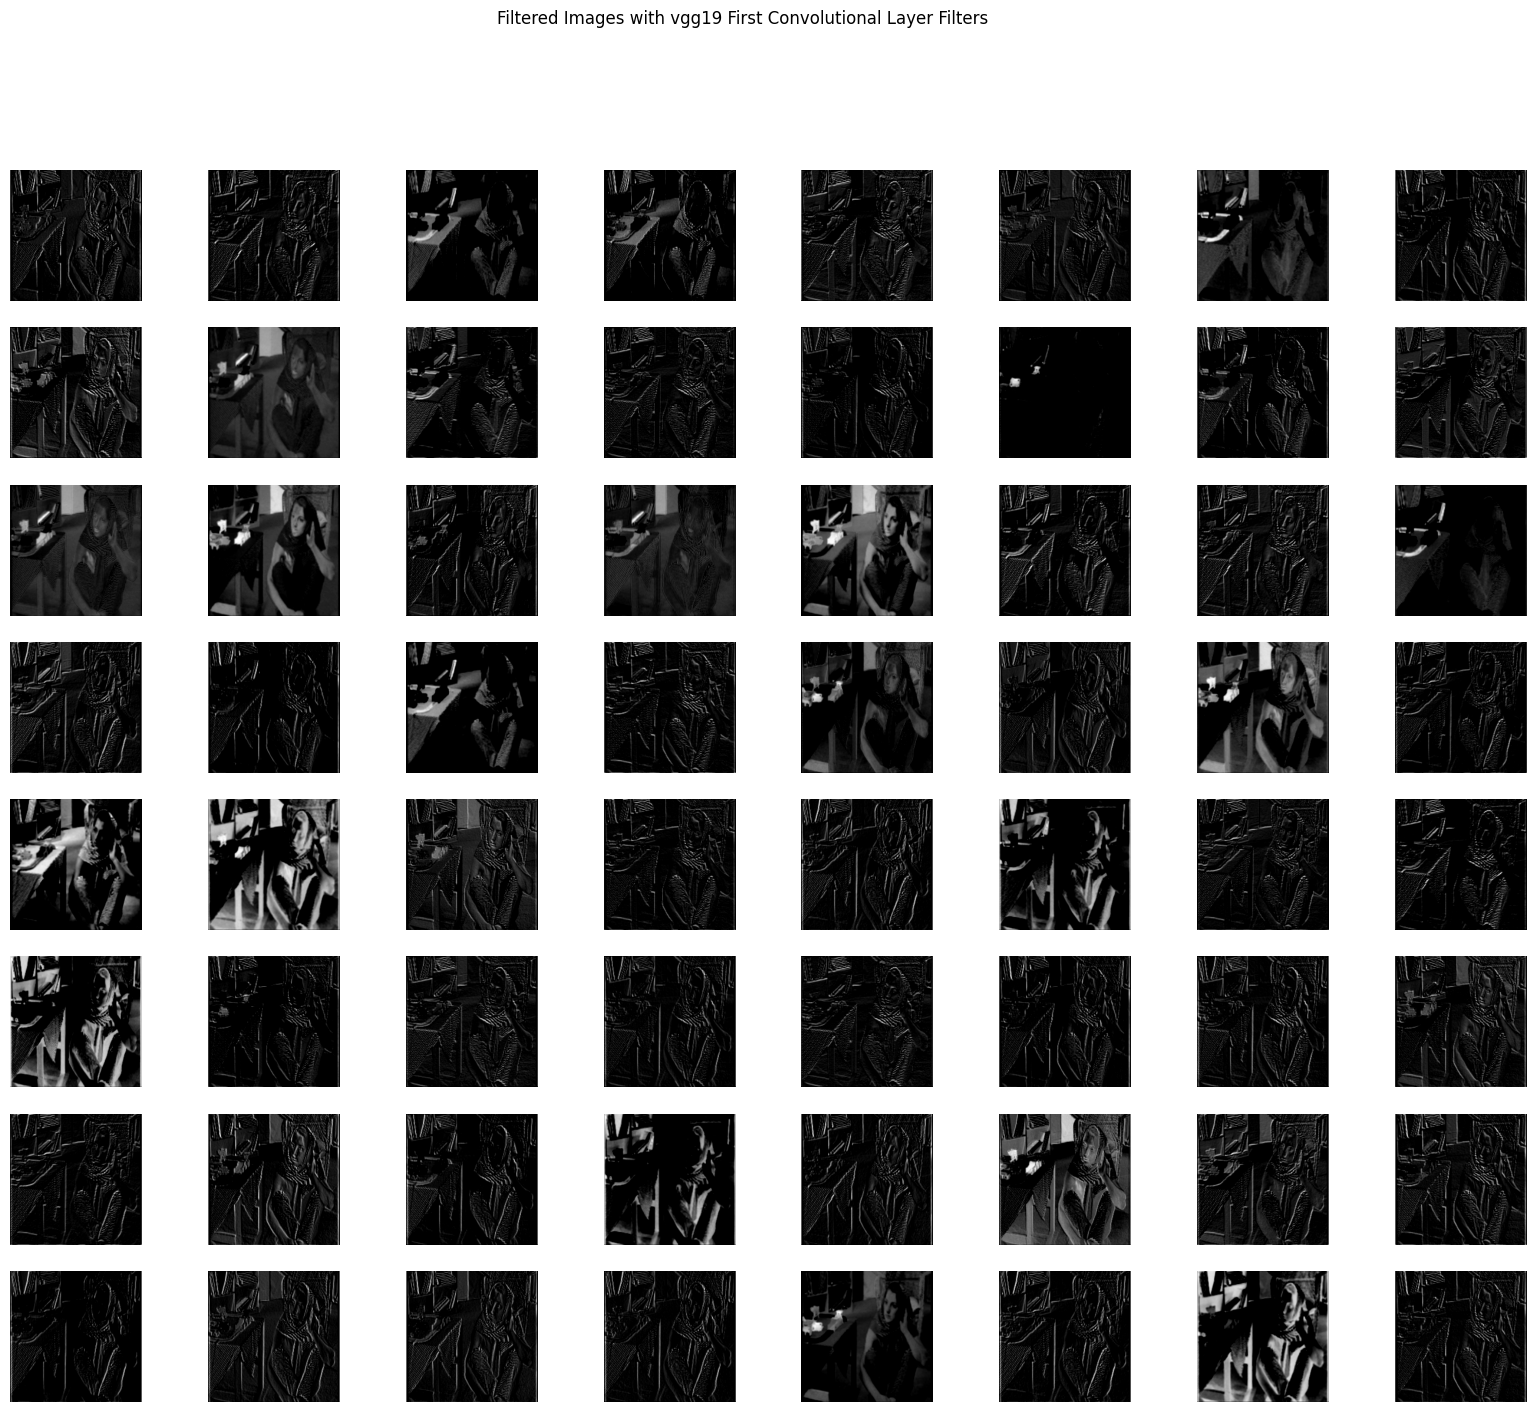

In [11]:
# Load an example image
image_path = '/content/drive/MyDrive/DSAI/asgn1/barbara.bmp'
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = tf.keras.applications.vgg19.preprocess_input(image)

plt.imshow(cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.plot()

print("\n\n")

# Apply the normalized filters to the image
model = VGG19(weights='imagenet', include_top=False)
model_name = model.name
model = Model(inputs=model.inputs , outputs=model.layers[1].output)
visualize_feature_maps(model, image, model_name)

1/1 [==============================] - 1s 1s/step
(1, 7, 7, 512)


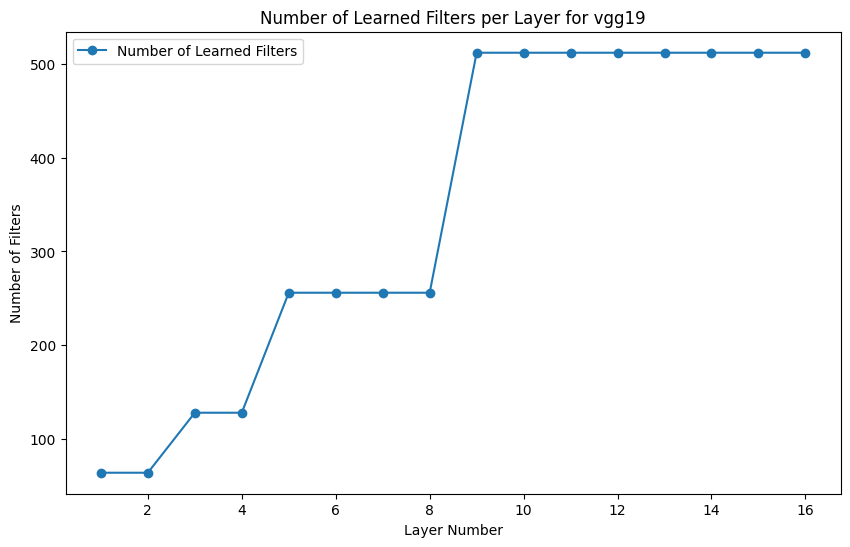

In [12]:
model = VGG19(weights='imagenet', include_top=False)
features = model.predict(image)
print(features.shape)
plot_filters_count(model)

In [13]:
count_duplicate_filters(model)

Number of duplicate filters in vgg19 = 0


Resnet50

In [14]:
model = ResNet50()
model.layers[2].name

'conv1_conv'

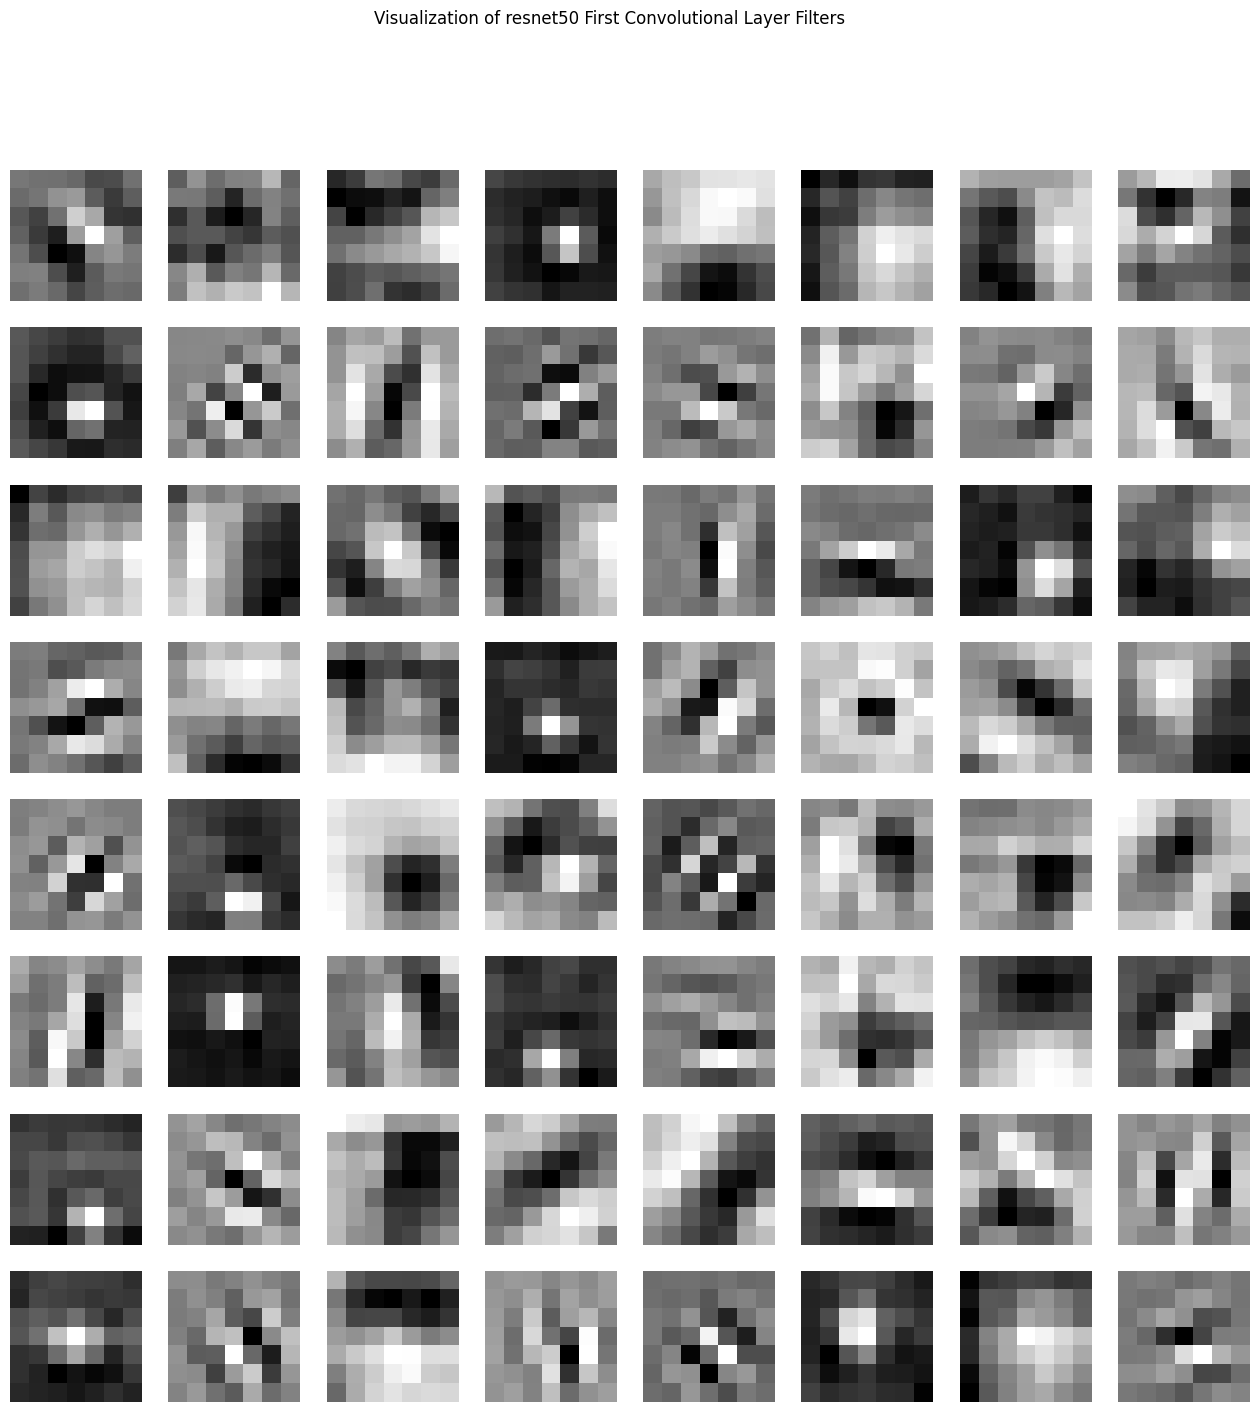

In [15]:
# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False)
filters = model.get_layer('conv1_conv').get_weights()[0]
visualize_filters(model, filters)

1/1 [==============================] - 0s 94ms/step


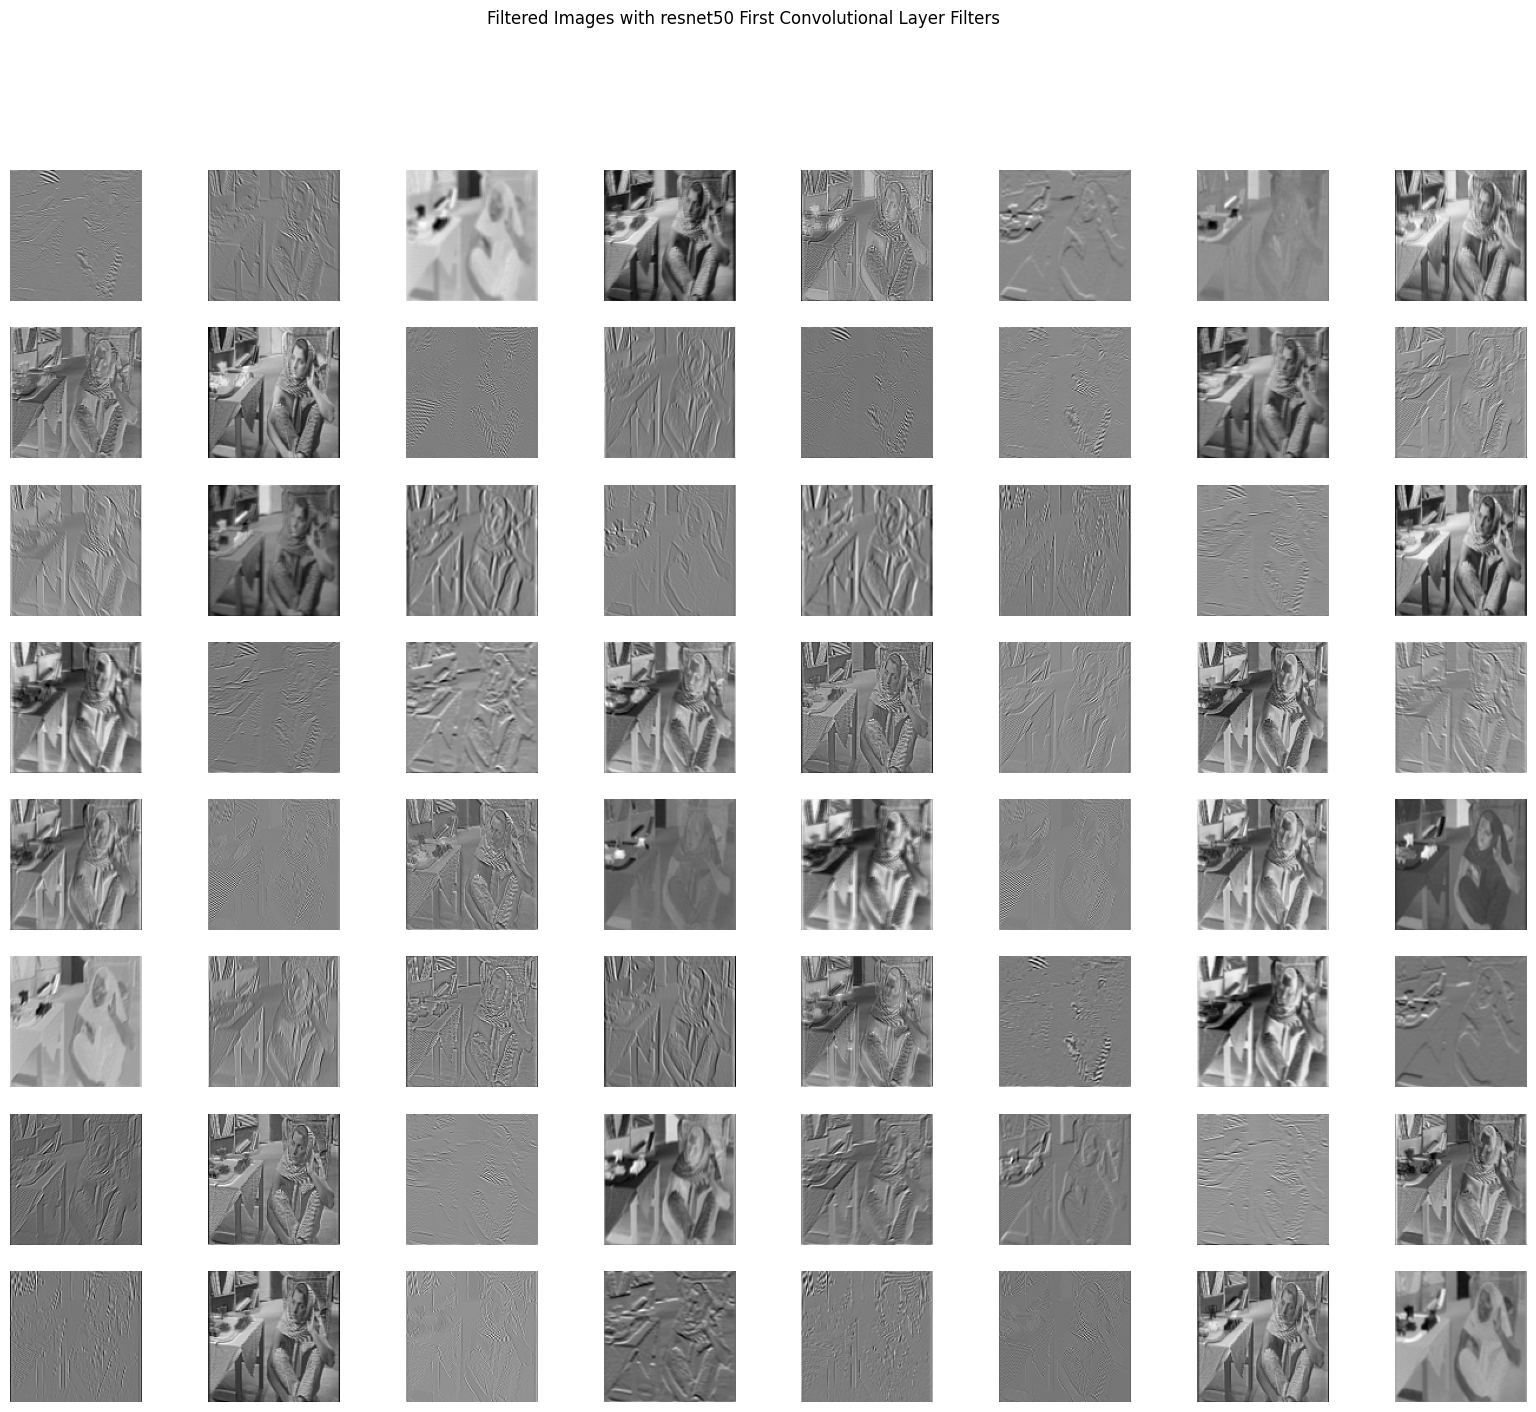

In [16]:
# Load an example image
image_path = '/content/drive/MyDrive/DSAI/asgn1/barbara.bmp'
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = tf.keras.applications.resnet50.preprocess_input(image)

# Apply the normalized filters to the image
model = ResNet50(weights='imagenet', include_top=False)
model_name = model.name
model = Model(inputs=model.inputs , outputs=model.layers[2].output)
visualize_feature_maps(model, image, model_name)

1/1 [==============================] - 1s 1s/step
(1, 7, 7, 2048)


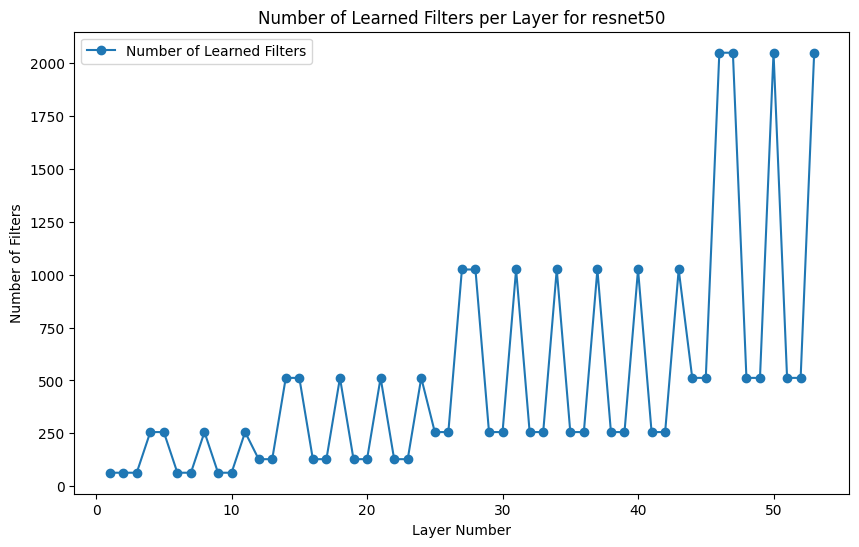

In [17]:
model = ResNet50(weights='imagenet', include_top=False)
features = model.predict(image)
print(features.shape)
plot_filters_count(model)

In [18]:
count_duplicate_filters(model)

Number of duplicate filters in resnet50 = 0


In [20]:
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
import pandas as pd

# Load an example image
image_path = '/content/drive/MyDrive/DSAI/asgn1/barbara.bmp'
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = tf.keras.applications.vgg19.preprocess_input(image)

model = VGG19(weights='imagenet')

# Function to compute the absolute difference between two sets of weights
def compute_weight_difference(weights_before, weights_after):
    absolute_difference = []
    for w_before, w_after in zip(weights_before, weights_after):
        absolute_difference.append(w_before - w_after)
    return absolute_difference


# Get the weights of the convolutional layers before training
weights_before_training = model.get_weights()

# Perform training (your training code here)
model = retrain_model_with_image(model, image)

# Get the weights of the convolutional layers after training
weights_after_training = model.get_weights()

# Compute the absolute difference in weights
weight_difference = compute_weight_difference(weights_before_training, weights_after_training)

# Print or analyze the weight differences

weight_table_data=[]
for layer_num, diff in enumerate(weight_difference):
    diff = np.mean(diff)
    if diff < 0:
        weight_table_data.append([model.name, layer_num, 'weight decay'])
    elif diff==0:
         weight_table_data.append([model.name, layer_num, 'Same'])
    else:
         weight_table_data.append([model.name, layer_num, 'weight gain'])

df = pd.DataFrame(weight_table_data, columns = ['Model Name', 'Layer Number', 'Weight Change'])
df

Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 11.3139 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 4s 4s/step - loss: 7.3380 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 4.3443 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.0339 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 2.1646e-04 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 5s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 4s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000


Model Name  Layer Number Weight Change
0       vgg19             0   weight gain
1       vgg19             1   weight gain
2       vgg19             2  weight decay
3       vgg19             3   weight gain
4       vgg19             4   weight gain
5       vgg19             5   weight gain
6       vgg19             6  weight decay
7       vgg19             7  weight decay
8       vgg19             8  weight decay
9       vgg19             9   weight gain
10      vgg19            10   weight gain
11      vgg19            11   weight gain
12      vgg19            12   weight gain
13      vgg19            13   weight gain
14      vgg19            14   weight gain
15      vgg19            15   weight gain
16      vgg19            16  weight decay
17      vgg19            17   weight gain
18      vgg19            18   weight gain
19      vgg19            19   weight gain
20      vgg19            20  weight decay
21      vgg19            21  weight decay
22      vgg19            22   weight gain
23      vgg19            23   weight gain
24      vgg19            24   weight gain
25      vgg19            25   weight gain
26      vgg19            26   weight gain
27      vgg19            27   weight gain
28      vgg19            28   weight gain
29      vgg19            29  weight decay
30      vgg19            30   weight gain
31      vgg19            31   weight gain
32      vgg19            32   weight gain
33      vgg19            33   weight gain
34      vgg19            34   weight gain
35      vgg19            35   weight gain
36      vgg19            36   weight gain
37      vgg19            37   weight gain

## Task 8
- Prepare a table by applying multiple images to the same model and writing your observations in filter weights (weights are changing in all layers or specific layers). Repeat this experiment for multiple models and multiple input images

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG19, ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D

# Define models and input images
models = {
    'VGG19': VGG19(weights='imagenet', include_top=False),
    'ResNet50': ResNet50(weights='imagenet', include_top=False)
}
input_images = [
    '/content/drive/MyDrive/DSAI/asgn1/barbara.bmp',
    '/content/drive/MyDrive/DSAI/asgn1/sailboat.bmp',
]  # list of input images

# Prepare the table
table_data = []


def preprocess_image_input(model_name, input_image):
    if model_name == 'VGG19':
        return tf.keras.applications.vgg16.preprocess_input(image_array)
    elif model_name == 'ResNet50':
        return tf.keras.applications.resnet50.preprocess_input(image_array)
    return None

def get_conv2d_layers(model):
    return [(idx, layer.name) for idx, layer in enumerate(model.layers) if isinstance(layer, Conv2D)]

# Loop through each model
for model_name, model in models.items():
    # Loop through each input image
    for image_filepath in input_images:
        # Load the input image
        image = load_img(image_filepath, target_size=(224, 224))
        image_array = img_to_array(image)
        image_array = preprocess_image_input(model_name, image_array)

        # Apply the model to the input image
        features = model.predict(np.expand_dims(image_array, axis=0))

        layers = get_conv2d_layers(model)
        total_layers = len(model.layers)

        for layer_idx, layer_name in layers:
            num_filters = model.layers[layer_idx].filters
            current_row =[
                model_name,
                image_filepath,
                total_layers,
                num_filters,
                layer_idx,
                layer_name,
            ]
            # Append the observations to the table data
            table_data.append(current_row)

# Create a DataFrame from the table data
df = pd.DataFrame(table_data, columns=[
    'Model Name',
    'Input Image',
    'Total Number of Layers',
    'Number of Filters',
    'Present Layer Number',
    'Layer Name',
])

# Display the table
df

1/1 [==============================] - 0s 170ms/step


Model Name                                     Input Image  \
0        VGG19   /content/drive/MyDrive/DSAI/asgn1/barbara.bmp   
1        VGG19   /content/drive/MyDrive/DSAI/asgn1/barbara.bmp   
2        VGG19   /content/drive/MyDrive/DSAI/asgn1/barbara.bmp   
3        VGG19   /content/drive/MyDrive/DSAI/asgn1/barbara.bmp   
4        VGG19   /content/drive/MyDrive/DSAI/asgn1/barbara.bmp   
..         ...                                             ...   
133   ResNet50  /content/drive/MyDrive/DSAI/asgn1/sailboat.bmp   
134   ResNet50  /content/drive/MyDrive/DSAI/asgn1/sailboat.bmp   
135   ResNet50  /content/drive/MyDrive/DSAI/asgn1/sailboat.bmp   
136   ResNet50  /content/drive/MyDrive/DSAI/asgn1/sailboat.bmp   
137   ResNet50  /content/drive/MyDrive/DSAI/asgn1/sailboat.bmp   

     Total Number of Layers  Number of Filters  Present Layer Number  \
0                        22                 64                     1   
1                        22                 64                     2   
2                        22                128                     4   
3                        22                128                     5   
4                        22                256                     7   
..                      ...                ...                   ...   
133                     175                512                   158   
134                     175               2048                   161   
135                     175                512                   165   
136                     175                512                   168   
137                     175               2048                   171   

              Layer Name  
0           block1_conv1  
1           block1_conv2  
2           block2_conv1  
3           block2_conv2  
4           block3_conv1  
..                   ...  
133  conv5_block2_2_conv  
134  conv5_block2_3_conv  
135  conv5_block3_1_conv  
136  conv5_block3_2_conv  
137  conv5_block3_3_conv  

[138 rows x 6 columns]

In [23]:
df.to_csv('/content/drive/MyDrive/DSAI/asgn1/table_data.csv', index=False)

### 8.a

In [20]:
tot_filters_in_vgg19 = 0
model = VGG19(weights='imagenet', include_top=False)
layers = get_conv2d_layers(model)
for layer_idx, layer_name in layers:
    num_filters = model.layers[layer_idx].filters
    tot_filters_in_vgg19 += num_filters

print(f"Total Filters getting applied to a single image = {tot_filters_in_vgg19}")

Total Filters getting applied to a single image = 5504


### 8.b

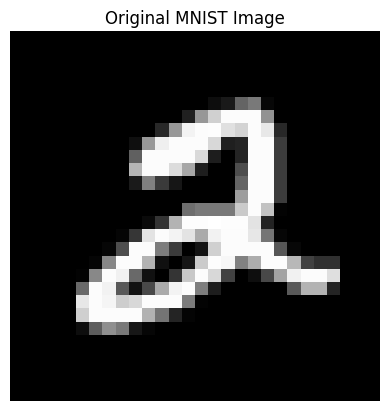

In [11]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load MNIST data
(train_images, train_labels), (_, _) = mnist.load_data()

# Select a single image
image = train_images[5]

# Display the selected image
plt.imshow(image, cmap='gray')
plt.title('Original MNIST Image')
plt.axis('off')
plt.show()

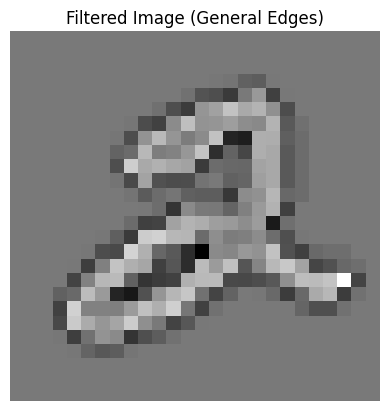

In [14]:
def apply_general_edge_filter(image):
    """
    Applies a simple convolutional filter to an image.
    Note: This is a basic implementation for demonstration purposes and does not handle edge cases.
    """
    # general edge detector
    filter = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ])
    filter_size = filter.shape[0]
    result = np.zeros((image.shape[0] - filter_size + 1, image.shape[1] - filter_size + 1))

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i, j] = np.sum(image[i:i+filter_size, j:j+filter_size] * filter)

    plt.imshow(result, cmap='gray')
    plt.title('Filtered Image (General Edges)')
    plt.axis('off')
    plt.show()

# Apply the filter to the image
apply_general_edge_filter(image)

### 8.c,d

Weight Changes for ResNet50

In [21]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import pandas as pd

# Load an example image
image_path = '/content/drive/MyDrive/DSAI/asgn1/barbara.bmp'
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension
image = tf.keras.applications.resnet50.preprocess_input(image)

# Load the ResNet50 model with include_top=False to exclude the fully connected layers
model = ResNet50(weights='imagenet')

# Function to compute the absolute difference between two sets of weights
def compute_weight_difference(weights_before, weights_after):
    absolute_difference = []
    for w_before, w_after in zip(weights_before, weights_after):
        absolute_difference.append(w_before - w_after)
    return absolute_difference


# Get the weights of the convolutional layers before training
weights_before_training = model.get_weights()

# Perform training (your training code here)
model = retrain_model_with_image(model, image)

# Get the weights of the convolutional layers after training
weights_after_training = model.get_weights()

# Compute the absolute difference in weights
weight_difference = compute_weight_difference(weights_before_training, weights_after_training)

# Print or analyze the weight differences

weight_table_data=[]
for layer_num, diff in enumerate(weight_difference):
    diff = np.mean(diff)
    if diff < 0:
        weight_table_data.append([model.name, layer_num, 'weight decay'])
    elif diff==0:
         weight_table_data.append([model.name, layer_num, 'Same'])
    else:
         weight_table_data.append([model.name, layer_num, 'weight gain'])

df = pd.DataFrame(weight_table_data, columns = ['Model Name', 'Layer Number', 'Weight Change'])
df

Epoch 1/10
1/1 [==============================] - 23s 23s/step - loss: 7.8854 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 1s 778ms/step - loss: 7.4633 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 1s 747ms/step - loss: 6.9609 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 1s 761ms/step - loss: 6.2466 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 1s 742ms/step - loss: 5.5014 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 770ms/step - loss: 4.6937 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 768ms/step - loss: 4.3176 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 4.0653 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 3.3906 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 897ms/step - loss: 2.2444 - accuracy: 1.0000


Model Name  Layer Number Weight Change
0     resnet50             0  weight decay
1     resnet50             1   weight gain
2     resnet50             2   weight gain
3     resnet50             3  weight decay
4     resnet50             4  weight decay
..         ...           ...           ...
315   resnet50           315   weight gain
316   resnet50           316   weight gain
317   resnet50           317   weight gain
318   resnet50           318   weight gain
319   resnet50           319   weight gain

[320 rows x 3 columns]